In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [2]:
flights = pd.read_csv('flights.csv', index_col=0)
weather = pd.read_csv('weather.csv', index_col=0)

flights = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')


In [3]:
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,343,...,1.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,1895,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,1077,...,7.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,3768,...,8.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,2013,1,1,615.0,0.0,833.0,-9.0,DL,N326NB,575,...,15.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


In [4]:
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

## 1. Средняя задержка по месяцам

Text(0, 0.5, 'количество задержек')

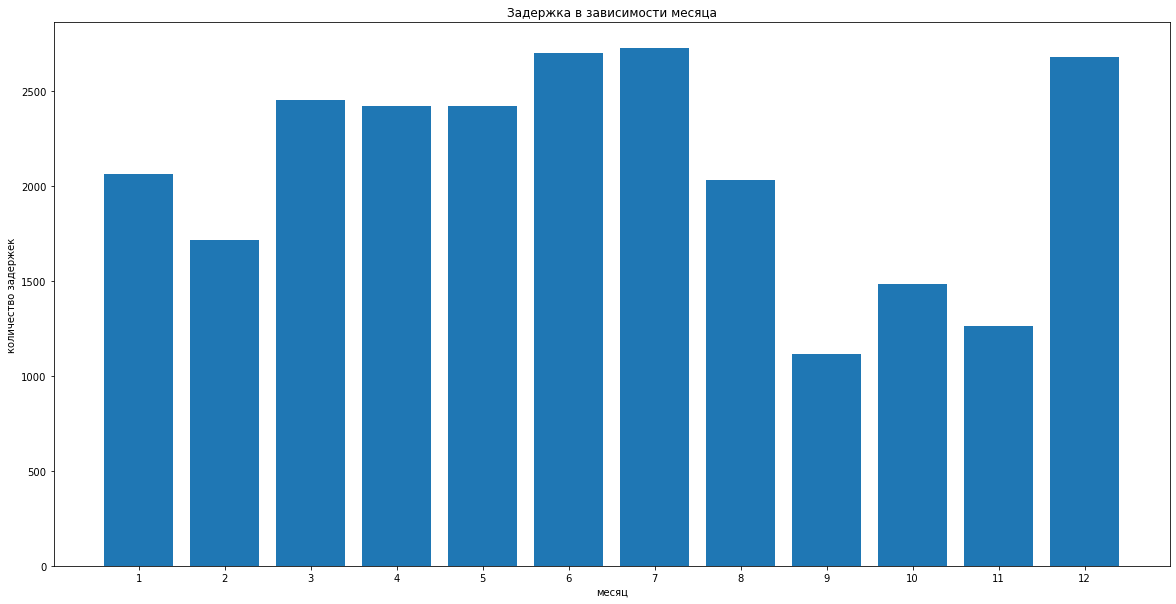

In [5]:
plt.figure(figsize=(20,10))

delay_mask = flights.dep_delay > 20


month_delays = flights[delay_mask].groupby('month').count()['arr_delay']
month_delays = month_delays.sort_index()

plt.bar(range(len(month_delays)), month_delays)
plt.xticks(range(len(month_delays)), month_delays.index)

plt.title('Задержка в зависимости месяца')
plt.xlabel('месяц')
plt.ylabel('количество задержек')

Задержкой будем считать опоздание более чем на 20 мнут. Количество задержек больше всего летом и в декабре, что связано с большик потоком пассажиров.

## 2. День наибольшей задержкой

Найдем день, в который средняя задержка была наибольшей:

In [6]:
flights.groupby(['year', 'month', 'day']).mean()['arr_delay'].idxmax()

(2013, 3, 8)

Таким образом это 8 марта 2013 года.

## 3. Соотношение количества задержек от общего количества рейсов

Text(0.5, 1.0, 'Соотношение количества задержек от общего количества рейсов')

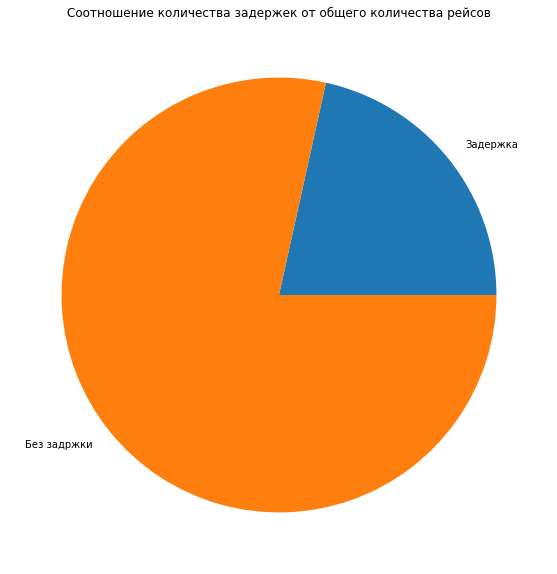

In [7]:
plt.figure(figsize=(20,10))

plt.pie([delay_mask.sum(), flights.shape[0] - delay_mask.sum()], labels=['Задержка', 'Без задржки'])

plt.title('Соотношение количества задержек от общего количества рейсов')

Видно, что всего задержек примерно четветь от общего числа рейсов.

## 4. Загруженность аэропортов Нью-Йорка

Найдем количество полетов из каждого аэропорта Нью-Йорка

In [8]:
flights.origin.value_counts()

EWR    117136
JFK       110
LGA         5
Name: origin, dtype: int64

Найдем среднюю задержку по каждому аэропорту.

In [9]:
flights.groupby('origin').mean()['arr_delay']

origin
EWR     9.099855
JFK    11.663636
LGA    98.400000
Name: arr_delay, dtype: float64

Хотя аэропорт EWR является наиболее загруженным, задержка рейсов в нем самая маленькая по нашим данным. С другой стороны по другим аэропортам не стоит делать выводы, так как по ним слишком мало данных.

## 5. Распределение задержек по часам дня

Text(0, 0.5, 'процент задержек')

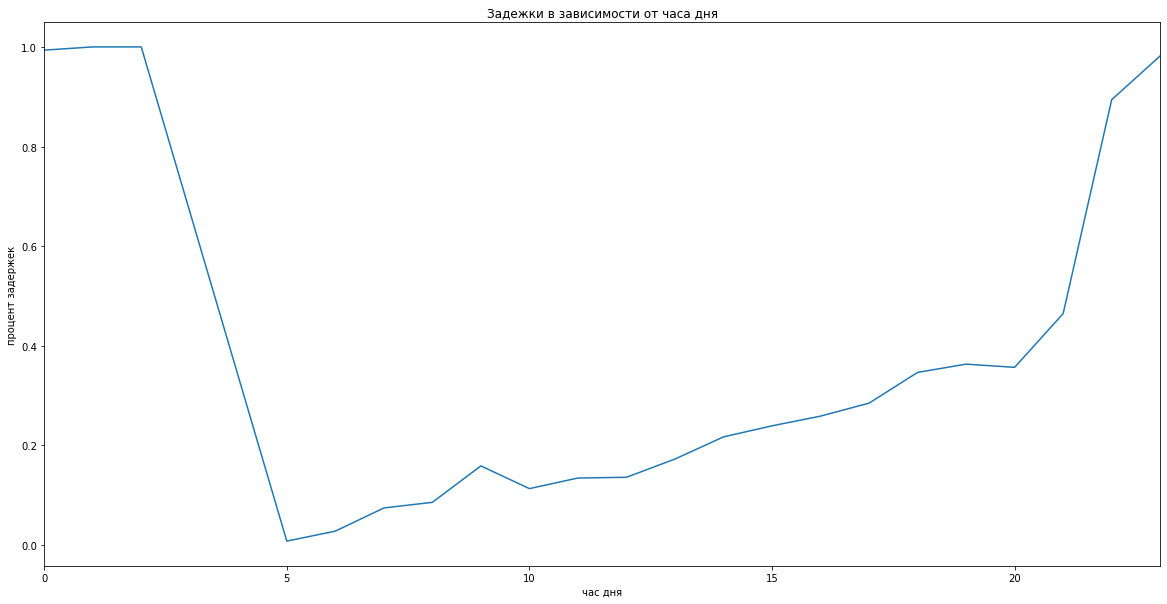

In [10]:
plt.figure(figsize=(20,10))

hour_delay = (flights[delay_mask].groupby(['hour']).count()['arr_delay'] / \
              flights.groupby(['hour']).count()['arr_delay']).dropna()
hour_delay.plot()

plt.title('Задежки в зависимости от часа дня')
plt.xlabel('час дня')
plt.ylabel('процент задержек')

На графике видно, что процент задержек от общего числа полетов больше ночью.

## 6. Задержка в зависимости от компании

Text(0, 0.5, 'средняя задержка')

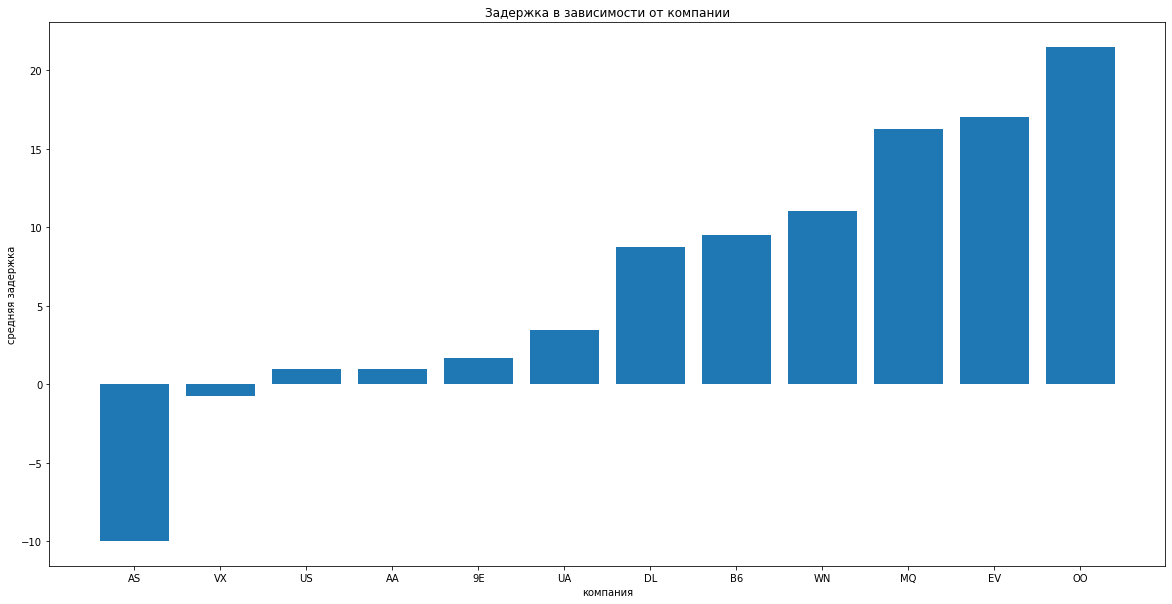

In [11]:
plt.figure(figsize=(20,10))


carrier_delays = flights.groupby('carrier').mean()['arr_delay']
carrier_delays = carrier_delays.sort_values()

plt.bar(range(len(carrier_delays)), carrier_delays)
plt.xticks(range(len(carrier_delays)), carrier_delays.index)

plt.title('Задержка в зависимости от компании')
plt.xlabel('компания')
plt.ylabel('средняя задержка')

На графике представлена средняя задержка для каждой авиакомпании. Этот параметр у компаний FL и F9 хуже всех. Любобытно, что у некоторый авиакомпаний средняя задержка отрицательна.

## 7. Задержка в зависимости от города

Text(0.5, 0, 'средняя задержка')

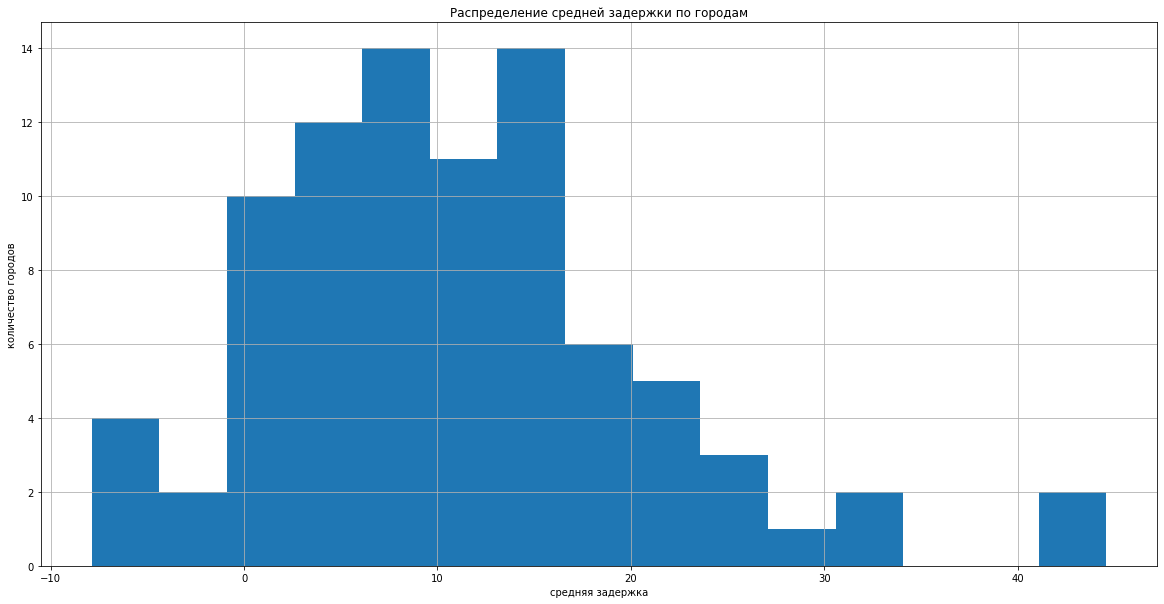

In [12]:
plt.figure(figsize=(20,10))

city_delays = flights.groupby('dest').mean()['arr_delay']
city_delays = city_delays.sort_values()

city_delays.hist(bins=15)

plt.title('Распределение средней задержки по городам')
plt.ylabel('количество городов')
plt.xlabel('средняя задержка')

Видно, что в большинство городов самолеты в среднем задерживаются на 10 минут. Распределение похоже на нормальное. Посмотрим на города в хвосте распределения:

In [13]:
city_delays[-6:-1]

dest
RIC    25.866460
JAC    29.894737
OKC    30.619048
TUL    33.818493
TYS    41.426282
Name: arr_delay, dtype: float64

## 8. Зависимость задержки от видимости

Text(0, 0.5, 'средняя задержка')

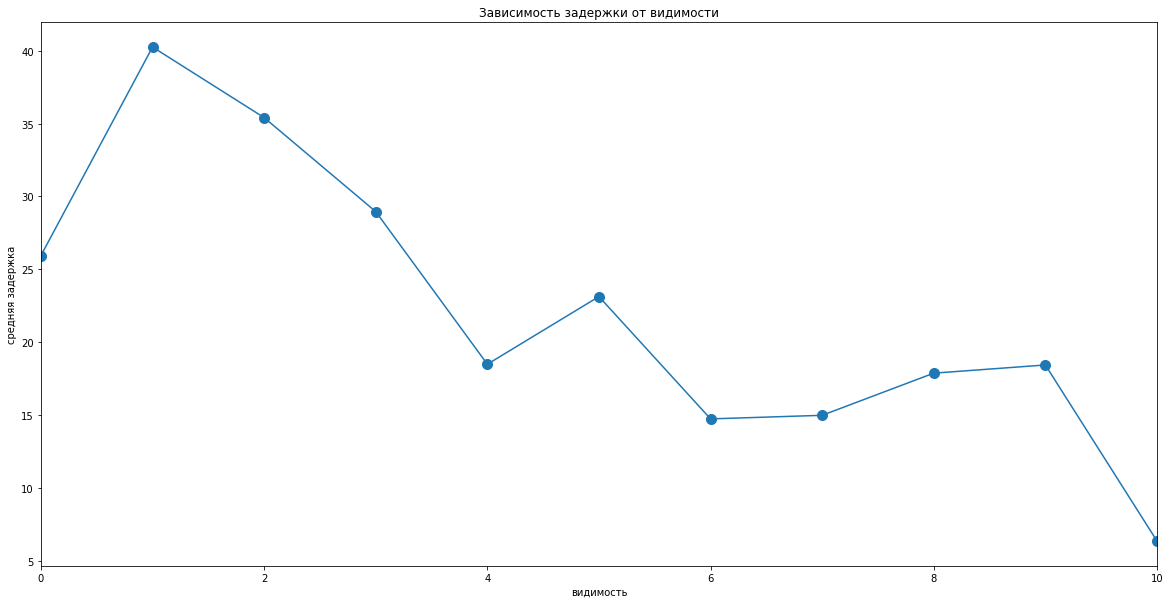

In [14]:
plt.figure(figsize=(20,10))

flights['visib'] = flights['visib'].apply(round)

visib_delay = flights.groupby('visib').mean()['arr_delay']
plt.scatter(visib_delay.index, visib_delay, s=100)
visib_delay.plot()

plt.title('Зависимость задержки от видимости')
plt.xlabel('видимость')
plt.ylabel('средняя задержка')

Видно, что при плохой видимости задержка выше. Здесь я округлил видимость до целого числа.

## 9. Зависимость задержки от скорости ветра

Text(0, 0.5, 'среднее время задержки')

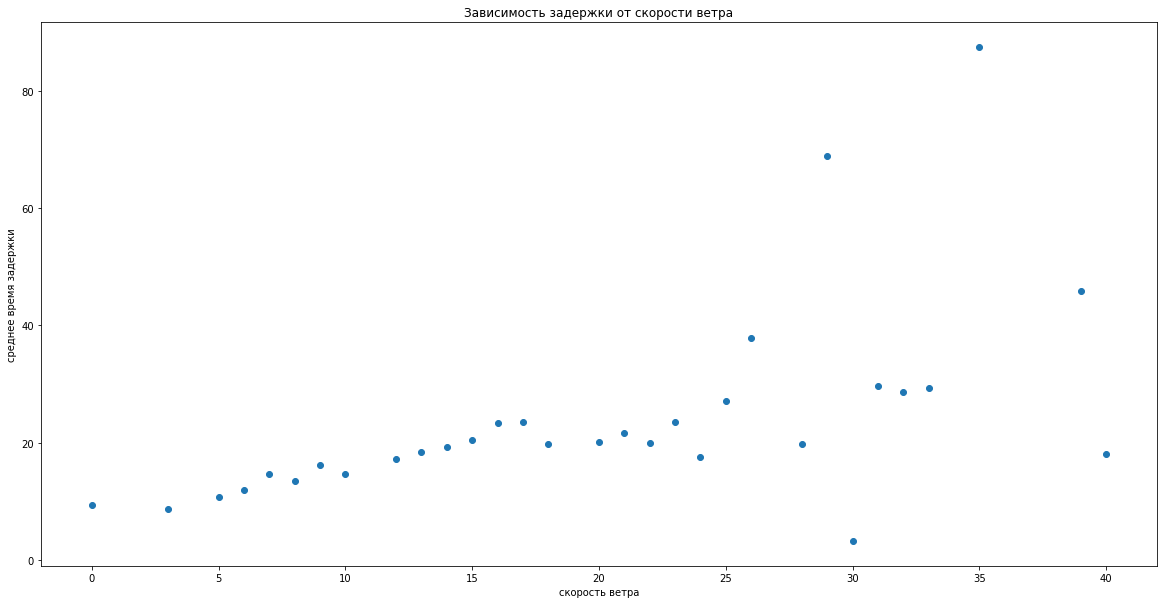

In [15]:
plt.figure(figsize=(20,10))


flights['wind_speed'] = flights.wind_speed.apply(lambda x: x if np.isnan(x) else round(x))

wind_delay = flights.groupby('wind_speed').mean()['dep_delay']
wind_delay = wind_delay.sort_index()
wind_delay = wind_delay.drop(labels=[wind_delay.index[-1]])
plt.scatter(wind_delay.index, wind_delay)

plt.title('Зависимость задержки от скорости ветра')
plt.xlabel('скорость ветра')
plt.ylabel('среднее время задержки')

Можем наблюдать тренд на увеличение времени задержки с ростом скорости ветра. Здесь я округлил скорость ветра до целого числа.

## 10. Зависимость задержки от направления ветра

Text(0, 0.5, 'среднее время задержки')

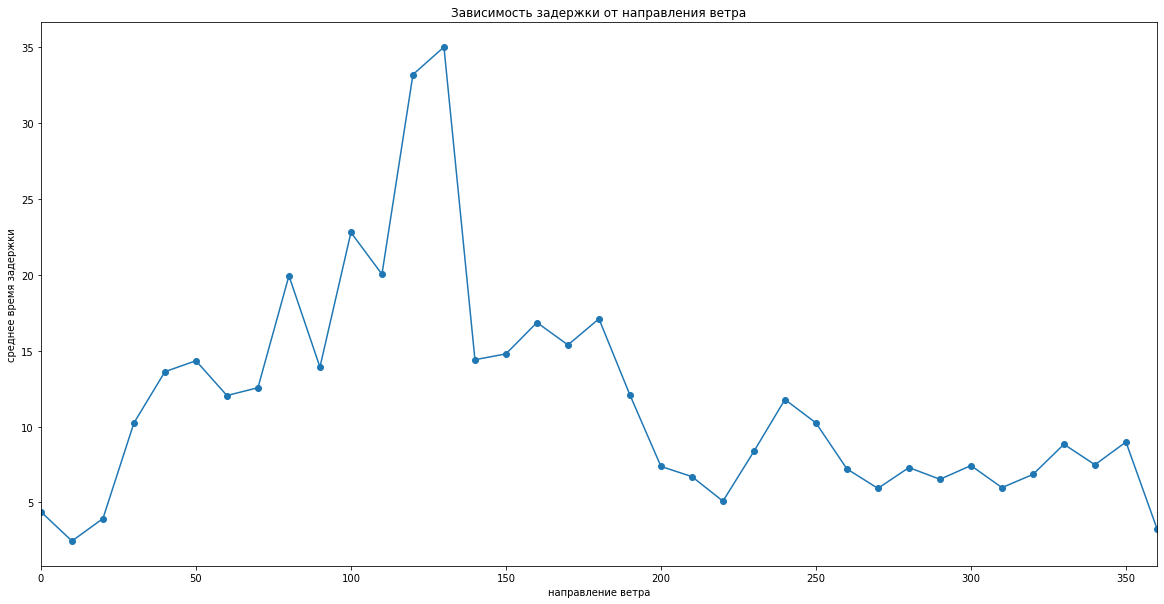

In [16]:
plt.figure(figsize=(20,10))


flights['wind_dir'] = flights.wind_dir.apply(lambda x: x if np.isnan(x) else round(x))

wind_dir_delay = flights.groupby('wind_dir').mean()['arr_delay']
wind_dir_delay = wind_dir_delay.sort_index()
plt.scatter(wind_dir_delay.index, wind_dir_delay)
wind_dir_delay.plot()

plt.title('Зависимость задержки от направления ветра')
plt.xlabel('направление ветра')
plt.ylabel('среднее время задержки')

Задержка выше всего при направлении ветра 150 градусов. Это соответствует ветру с юго-востока.